## House Price Prediciton – Kaggle Competition
### Michael Kim
### 10/10/21
Data From: 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import math

### Load the Data:

In [2]:
df_train = pd.read_csv('house_prices_train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df_test = pd.read_csv('house_prices_test.csv')
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_length = df_train.shape[0]
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [5]:
# drop Id column
df_train.drop(['Id'], axis=1, inplace=True)

## Correlation Matrix of House Features:

<AxesSubplot:>

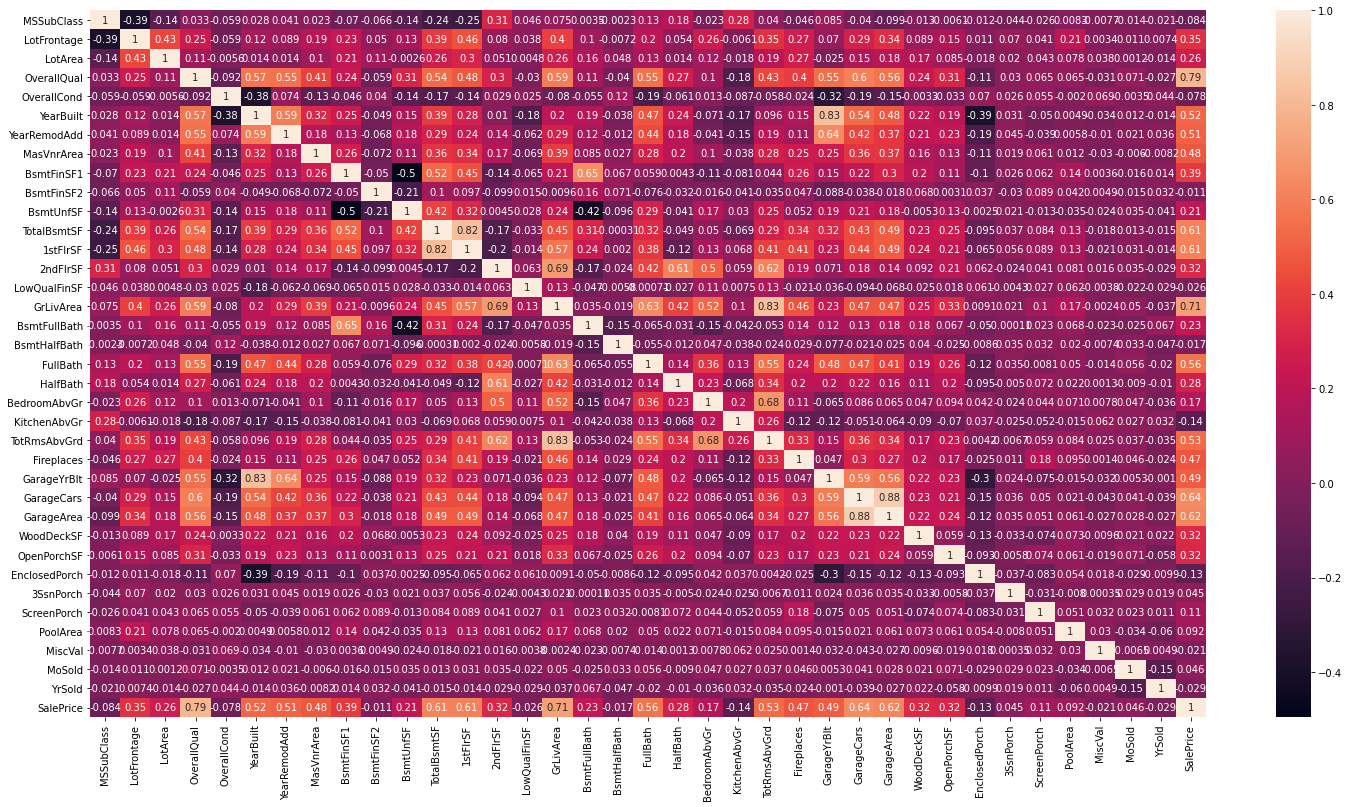

In [6]:
df_train_corr = df_train.corr()
f, ax = plt.subplots(figsize=(25,13))
sns.heatmap(df_train_corr, annot=True)

### Lot of NaNs in Train and Test Data

In [7]:
df_train.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [8]:
df_test.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
dtype: int64

### Combine Train and Test Data 
#### (Ensure Matching Columns After One-Hot Encoding)

In [9]:
df_combined = pd.concat([df_train, df_test],ignore_index=True)
df_combined

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,NaN
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,NaN
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,NaN
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,NaN
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,2915.0
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,2916.0
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,2917.0
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,2918.0


In [10]:
train_prices = df_train['SalePrice']
train_prices

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Split Data Between Numerical and Categorical:

In [11]:
# get list of categorical and numerical features
categorical_feats = df_train.select_dtypes(include=['object']).columns
numerical_feats = df_train.select_dtypes(exclude=['object']).columns
numerical_feats = numerical_feats.drop('SalePrice')
len(categorical_feats), len(numerical_feats)

(43, 36)

In [12]:
# split df_combined by feature type
df_combined_cat = df_combined[categorical_feats]
df_combined_num = df_combined[numerical_feats]
df_combined_cat.shape, df_combined_num.shape

((2919, 43), (2919, 36))

### One-Hot Encoding of All Categorical Data

In [13]:
# convert categorical data to numerical with dummy values
df_combined_cat = pd.get_dummies(df_combined_cat)
df_combined_cat.shape

(2919, 252)

In [14]:
# replace missing numerical values with feature's median
df_combined_num = df_combined_num.fillna(df_combined_num.median())
df_combined_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


### Split Data into Four Groups:
- train: categorical
- train: numerical
- test: categorical
- test: numerical

In [15]:
df_train_cat = df_combined_cat[:1460]
df_train_num = df_combined_num[:1460]
df_test_cat = df_combined_cat[1460:]
df_test_num = df_combined_num[1460:]
df_train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


### Recombine Datasets

In [16]:
df_train = pd.concat([df_train_cat, df_train_num], axis=1)
df_train.shape

(1460, 288)

In [17]:
df_test = pd.concat([df_test_cat, df_test_num], axis=1)
df_test.shape

(1459, 288)

## Linear Regression Model

In [18]:
#x_train, x_test, y_train, y_test = train_test_splt()

In [19]:
# x = df_train.loc[:, df_train.columns.values]
# x



#     x = df_train.loc[:, feat_list].values
#    y_true = df_train.loc[:, y_feat].values

In [20]:
# extract data
# x = df_joined.loc[:, x_feat_list].values
# y_true = df_joined.loc[:, y_feat].values

# lower the number of splits if there is not a lot of data available
# but we want at least 2 splits
# if len(x) < 50:
#     n_splits = max(2, math.ceil(len(x) / 5))

x = df_train
y_true = train_prices

# initialize regression object
reg = LinearRegression()

n_splits = 50

# init KFold object for cross validation
skfold = KFold(n_splits=n_splits)

# init empty array of same size
y_pred = np.empty_like(y_true)

for train_idx, test_idx in skfold.split(x, y_true):

    # get training data
    x_train = x.loc[train_idx, :]
    y_true_train = y_true[train_idx]

    # get testing data
    x_test = x.loc[test_idx, :]
    y_true_test = y_true[test_idx]

    # fit regression on training data
    reg.fit(x_train, y_true_train)

    # estimate the price for x_test
    #y_pred = reg.predict(x_test)
    y_pred[test_idx] = reg.predict(x_test)


# print model   
model_str = 'SalePrice' + f' = {reg.intercept_:.4f}'
for feat, coef in zip(df_train.columns, reg.coef_):
    model_str += f' + {coef:.4f} {feat}'

# compute r2
r2 = r2_score(y_true=y_true, y_pred=y_pred)
#model_str += f'\nr2 = {r2:.3}'

(model_str, r2)

('SalePrice = 276666.9328 + -21747.9642 MSZoning_C (all) + 15164.2962 MSZoning_FV + 1717.6368 MSZoning_RH + 4589.9277 MSZoning_RL + 276.1034 MSZoning_RM + -16328.1355 Street_Grvl + 16328.1355 Street_Pave + 1993.1268 Alley_Grvl + 551.2785 Alley_Pave + -2930.9715 LotShape_IR1 + 1880.6624 LotShape_IR2 + 2128.7763 LotShape_IR3 + -1078.4671 LotShape_Reg + 99.0788 LandContour_Bnk + 6651.6053 LandContour_HLS + -11996.7304 LandContour_Low + 5246.0463 LandContour_Lvl + 16901.9173 Utilities_AllPub + -16901.9173 Utilities_NoSeWa + 3539.6252 LotConfig_Corner + 12059.9049 LotConfig_CulDSac + -4426.9669 LotConfig_FR2 + -13543.2412 LotConfig_FR3 + 2370.6781 LotConfig_Inside + 11302.8738 LandSlope_Gtl + 19016.4989 LandSlope_Mod + -30319.3727 LandSlope_Sev + 2811.6599 Neighborhood_Blmngtn + 12691.3108 Neighborhood_Blueste + 1839.5276 Neighborhood_BrDale + -2271.1909 Neighborhood_BrkSide + -11737.2712 Neighborhood_ClearCr + -7922.6058 Neighborhood_CollgCr + 16131.1792 Neighborhood_Crawfor + -18963.4032 

## Predict Test Data

In [21]:
test_prices = reg.predict(df_test)
test_prices

array([112822.41321525, 155764.88697411, 186265.42350805, ...,
       181720.6119456 , 118912.37869461, 225412.36222752])

In [22]:
# save predictions as submission file for Kaggle competition
df_predictions = pd.DataFrame(test_prices)
df_submission = pd.read_csv('sample_submission.csv')
datasets = pd.concat([df_submission['Id'], df_predictions], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)
datasets

,Id,SalePrice
0,1461,112822.413215
1,1462,155764.886974
2,1463,186265.423508
3,1464,197269.728831
4,1465,203905.831455
...,...,...
1454,2915,85815.269656
1455,2916,80906.548621
1456,2917,181720.611946
1457,2918,118912.378695


# Other Regression Methods

In [23]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(df_train,train_prices,test_size = 0.3,random_state= 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 288), (438, 288), (1022,), (438,))

In [24]:
n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df_train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df_train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

rmse on train 6118444.093216869
rmse on train 57202.4808557531


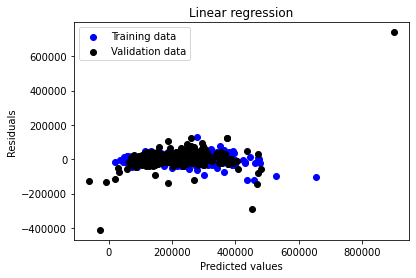

In [26]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

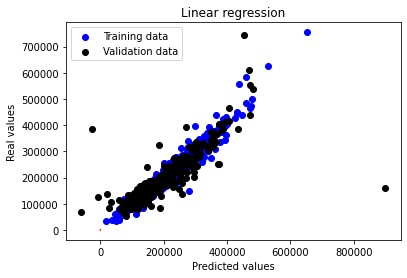

In [27]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('Best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

Best alpha 0.6
Try again for more precision with alphas centered around 0.6
Best alpha : 0.84
Ridge RMSE on Training set : 29531.058910874366


In [ ]:
coef = pd.Series(ridge.coef_, index = X_train.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions - Real values
plt.scatter(y_train_rdg, y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## Predict Prices on Test Data

In [ ]:
# test_prices = lr.predict(df_test)
# test_prices

In [ ]:
# # save predictions as submission file for Kaggle competition
# df_preds_lr = pd.DataFrame(test_prices)
# df_subs_lr = pd.read_csv('sample_submission.csv')
# datasets = pd.concat([df_subs_lr['Id'], df_preds_lr], axis=1)
# datasets.columns = ['Id', 'SalePrice']
# datasets.to_csv('sample_submission.csv', index=False)
# datasets

In [ ]:
# 
def regress_home_price(df_train, df_test, feat_list, y_feat='SalePrice', n_splits=10):
    """ multiple variable linear regression
    
    Args:
        df_train (pd.DataFrame): company stock and metric data
        df_test (pd.DataFrame): test data
        feat_list (np.array): list of independant variables
        y_feat (str): dependent variable; stock price by default
        n_splits (int): number of splits for cross validation
        
    Returns:
        model_str (str): a string of the regression equation and r2 score
    """

    feat_list.remove('Id')
    feat_list.remove('SalePrice')
    
    # extract data
    x = df_train.loc[:, feat_list].values
    y_true = df_train.loc[:, y_feat].values

    # initialize regression object
    reg = LinearRegression()

    # init KFold object for cross validation
    skfold = KFold(n_splits=n_splits)

    # init empty array of same size
    y_pred = np.empty_like(y_true)



    for train_idx, test_idx in skfold.split(x, y_true):

        # get training data
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]

        # get testing data
        x_test = x[test_idx, :]
        y_true_test = y_true[test_idx]

        # fit regression on training data
        reg.fit(x_train, y_true_train)

        # estimate the price for x_test
        #y_pred = reg.predict(x_test)
        y_pred[test_idx] = reg.predict(x_test)

    
    test_list = list(df_test['Id'])
    df_results = pd.DataFrame(columns=['Id', 'SalePrice'])
    df_test.drop(['Id'],axis=1)
        
    print(df_test)    
    
    for index, row in df_test.iterrows():
        price = reg.intercept_
        print(reg.coef_)
        for i, coef in enumerate(reg.coef_):
            price += row[i] * coef
        df_results = df_results.append({'Id': test_list[index],
                                        'SalePrice': price})
        
        
    return df_results

#     # print model   
#     model_str = y_feat + f' = {reg.intercept_:.4f}'
#     for feat, coef in zip(feat_list, reg.coef_):
#         model_str += f' + {coef:.4f} {feat}'

#     # compute r2
#     r2 = r2_score(y_true=y_true, y_pred=y_pred)
#     #model_str += f'\nr2 = {r2:.3}'

#     print (model_str, r2)